In [ ]:
import sys
print ('Running in colab:', 'google.colab' in sys.modules)
if 'google.colab' in sys.modules:
  folderloc = "drive/MyDrive/CMPE 255/"
else:
  folderloc = "Documents/SJSU/FALL_2022/"

Running in colab: True


#Import File

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
np.set_printoptions(linewidth=115)
folderloc ="/content/drive/Shareddrives/CMPE 255 - Team Project/"

In [ ]:
input_file = folderloc + "A_Z Handwritten Data.csv"
df = pd.read_csv(input_file, header = 0)
# backup_df = df.copy()

In [ ]:
#code split
# train, test = model_selection.train_test_split(df, test_size=0.20)
# train.to_csv(folderloc+'train.csv',index = False)
# test.to_csv(folderloc+'test.csv', index = False)


<bound method NDFrame.head of          0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0        0    0    0    0    0    0    0    0    0    0  ...      0      0   
1        0    0    0    0    0    0    0    0    0    0  ...      0      0   
2        0    0    0    0    0    0    0    0    0    0  ...      0      0   
3        0    0    0    0    0    0    0    0    0    0  ...      0      0   
4        0    0    0    0    0    0    0    0    0    0  ...      0      0   
...     ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
372445  25    0    0    0    0    0    0    0    0    0  ...      0      0   
372446  25    0    0    0    0    0    0    0    0    0  ...      0      0   
372447  25    0    0    0    0    0    0    0    0    0  ...      0      0   
372448  25    0    0    0    0    0    0    0    0    0  ...      0      0   
372449  25    0    0    0    0    0    0    0    0    0  ...      0      0   

        0.641  0.642  0.643  0.64

## Stratified Code Split

In [ ]:
#stratified code split
df_data = df.iloc[:,1:].values
df_class = df.iloc[:,0].values
#n_splits is how many times the for loop for .split will run
#each split is independent of each other and will generate indices needed to make the train and test sets
## This is useful for rerunning tests/models with different train/test set combinations
#the train and test set will have the same distributions of labels(classes/features/etc) from the original dataset
splitter = model_selection.StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_ids, test_ids in splitter.split(df_data, df_class):
  df_train = df.iloc[train_ids,:]
  df_test = df.iloc[test_ids,:]
  # X_train, y_train = df_data[train_ids], df_class[train_ids]
  # X_test, y_test = df_data[test_ids], df_class[test_ids]

### Stratified Distribution Comparisons

In [ ]:
#load stratified data form shared drive
df_train = pd.read_csv(folderloc + "train_stratified.csv",header = 0)
df_test = pd.read_csv(folderloc + "test_stratified.csv",header = 0)



In [ ]:
# code to clean df
del df_train
del df_test

In [ ]:

print("Difference in distrubtion between dataset and Train(stratified) labels : \n",df_train["0"].value_counts(sort=False,normalize=True).sort_index()-df["0"].value_counts(sort=False,normalize=True).sort_index())


print("Difference in distrubtion between dataset and Test(stratified) labels: \n",df_test["0"].value_counts(sort=False,normalize=True).sort_index()-df["0"].value_counts(sort=False,normalize=True).sort_index())
##Double check my work
print("Difference in distrubtion between dataset and dataset labels(expected 0s): \n",df["0"].value_counts(sort=False,normalize=True).sort_index()-df["0"].value_counts(sort=False,normalize=True).sort_index())

# unique, counts = np.unique(y_train,return_counts=True)
# total = counts.sum()
# print(total)
# print("Distribution of y_train: ",dict(zip(unique, counts/total * 100)))
# unique, counts = np.unique(y_test,return_counts=True)
# total = counts.sum()
# print("Distribution of y_test: ",dict(zip(unique, counts/total * 100)))
# print("Distribution of dataset labels: \n",df["0"].value_counts(sort=False,normalize=True))


Difference in distrubtion between dataset and Train(stratified) labels : 
 0    -6.712310e-07
1    -1.342462e-06
2    -6.712310e-07
3    -6.712310e-07
4     0.000000e+00
5    -1.342462e-06
6     1.342462e-06
7    -1.342462e-06
8     0.000000e+00
9    -1.342462e-06
10   -1.342462e-06
11    6.712310e-07
12    6.712310e-07
13    0.000000e+00
14    0.000000e+00
15    6.712310e-07
16    1.342462e-06
17    6.712310e-07
18   -6.712310e-07
19    0.000000e+00
20    2.013693e-06
21    1.342462e-06
22   -6.712310e-07
23    1.342462e-06
24   -6.712310e-07
25    6.712310e-07
Name: 0, dtype: float64
Difference in distrubtion between dataset and Test(stratified) labels: 
 0     0.000003
1     0.000005
2     0.000003
3     0.000003
4     0.000000
5     0.000005
6    -0.000005
7     0.000005
8     0.000000
9     0.000005
10    0.000005
11   -0.000003
12   -0.000003
13    0.000000
14    0.000000
15   -0.000003
16   -0.000005
17   -0.000003
18    0.000003
19    0.000000
20   -0.000008
21   -0.000005
22  

### Saving Stratified Train/Test

In [ ]:

df_train.to_csv(folderloc+'train_stratified.csv',index = False)
df_test.to_csv(folderloc+'test_stratified.csv', index = False)

# Make train/test using a balanced train/test

In [ ]:
#Single train/test stratified set using train_test_split
alphabet = []
train, test = model_selection.train_test_split(df, test_size=0.20)
train.to_csv(folderloc+'train.csv',index = False)
test.to_csv(folderloc+'test.csv', index = False)

#Import Group Train/Test and view sample data

In [ ]:
input_train = pd.read_csv(folderloc + "train.csv",header = 0)


In [ ]:
input_test = pd.read_csv(folderloc + "test.csv",header = 0)

## Origianal Train/Test Distribution Comparison

In [ ]:
#Check distribution

print("Difference in distrubtion between dataset and Train(not stratified) labels: \n",input_train["0"].value_counts(sort=False,normalize=True).sort_index()-df["0"].value_counts(sort=False,normalize=True).sort_index())
print("Difference in distrubtion between dataset and Test labels(not stratified): \n",input_test["0"].value_counts(sort=False,normalize=True).sort_index()-df["0"].value_counts(sort=False,normalize=True).sort_index())

Difference in distrubtion between dataset and Train(not stratified) labels: 
 0    -0.000071
1     0.000113
2    -0.000075
3    -0.000165
4     0.000275
5     0.000022
6     0.000162
7    -0.000179
8     0.000013
9     0.000076
10   -0.000075
11    0.000108
12   -0.000113
13   -0.000175
14    0.000020
15    0.000350
16   -0.000160
17   -0.000191
18    0.000144
19    0.000023
20   -0.000028
21   -0.000116
22    0.000100
23    0.000035
24   -0.000075
25   -0.000019
Name: 0, dtype: float64
Difference in distrubtion between dataset and Test labels(not stratified): 
 0     0.000285
1    -0.000451
2     0.000298
3     0.000660
4    -0.001101
5    -0.000089
6    -0.000650
7     0.000717
8    -0.000054
9    -0.000303
10    0.000301
11   -0.000432
12    0.000454
13    0.000698
14   -0.000081
15   -0.001399
16    0.000639
17    0.000763
18   -0.000575
19   -0.000094
20    0.000113
21    0.000464
22   -0.000400
23   -0.000140
24    0.000298
25    0.000078
Name: 0, dtype: float64


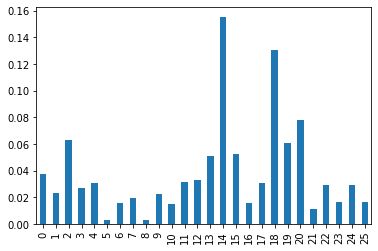

In [ ]:
#Distribution of train set
input_train["0"].value_counts(sort=False,normalize=True).sort_index().plot(kind='bar')

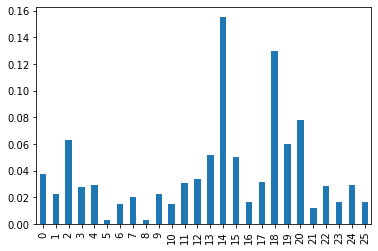

In [ ]:
#Distribution of test set
input_test["0"].value_counts(sort=False,normalize=True).sort_index().plot(kind='bar')

In [ ]:
row = 0
test_mat_1 = input_test.iloc[0:2,1:].values
test_mat_1_label = input_test.iloc[0:1,0]
print(test_mat_1)
# print(test_mat_1_label)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
test_mat_1 = np.resize(test_mat_1, (2,28, 28))
print(test_mat_1)
im = Image.fromarray(test_mat_1[0].astype(np.uint8))
im

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
input_test.info()
input_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74490 entries, 0 to 74489
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 446.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297960 entries, 0 to 297959
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 1.7 GB


In [ ]:
test_mat = input_test.iloc[:,1:].values
test_mat_class = input_test.iloc[:,0].values

In [ ]:
train_mat = input_train.iloc[:,1:].values

In [ ]:
train_mat_class = input_train.iloc[:,0].values

In [ ]:
train_mat[0,:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  83, 255, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 163, 255, 206,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39, 242, 255, 119,   0,   

#K Nearest Neighbor Classifier

In [ ]:
neigh = KNeighborsClassifier()

In [ ]:
neigh.fit(train_mat, train_mat_class)

KNeighborsClassifier()

In [ ]:
pred = neigh.predict(test_mat)
print(pred)

[ 9 14  1 ... 13 14  7]


#Scoring KNN

In [ ]:
print(neigh.score(test_mat,test_mat_class))

0.9588401127668144


In [ ]:
input_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297960 entries, 0 to 297959
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 1.7 GB


In [ ]:
df.info()

NameError: ignored

In [ ]:
df.iloc[:,0].value_counts()

14    57825
18    48419
20    29008
2     23409
19    22495
15    19341
13    19010
0     13869
12    12336
11    11586
17    11566
4     11440
24    10859
22    10784
3     10134
1      8668
9      8493
7      7218
23     6272
25     6076
16     5812
6      5762
10     5603
21     4182
5      1163
8      1120
Name: 0, dtype: int64

In [ ]:
row1 = df.iloc[16290,:].values
row1 = row1[1:785]

print(row1)
print(type(row1))
print(row1.shape)


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  20 114 224   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10  87 188 226 255   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  44 167 177  51 223 137   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   5 113 206 118   0  83 255  20   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  25 142 206  44   0   0 191 102   1

In [ ]:
mat1 = np.resize(row1, (28, 28))

In [ ]:

print(mat1)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  20 114 224   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10  87 188 226 255   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  44 167 177  51 223 137   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   5 113 206 118   0  83 255  20   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  25 142 206  44   

In [ ]:
im = Image.fromarray(mat1.astype(np.uint8))

In [ ]:
im